This notebook is based on tutorial available on
https://www.codementor.io/@innat_2k14/titanic-kaggle-machine-learning-from-disaster-part-1-10gbvqzguc

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanicdata/test.csv
/kaggle/input/titanicdata/train.csv


In [2]:
# Load and peek training data
train_data = pd.read_csv("/kaggle/input/titanicdata/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* We have to predict the value for "Survived" column
* **This is a binary classification problem**


In [3]:
# Get some information about training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* PassengerId: Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
* Survived: Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger. We need to parse before using it.
* Sex: Gender Categorical variable that should be encoded. We can use dummy -variable to encode it.
* Age: Age in years.
* SibSp: # of siblings or spouses aboard the Titanic.
* Parch: Parents / Children aboard the Titanic.
* Ticket: Ticket number
* Fare: Ticket fare
* Cabin: Cabin number
* Embarked: Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. 

In [4]:
test_data = pd.read_csv("/kaggle/input/titanicdata/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Concatenate the two data sets to create a big dataset. This will be useful to process data
dataset =  pd.concat(objs=[train_data, test_data], axis=0).reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Handling missing data

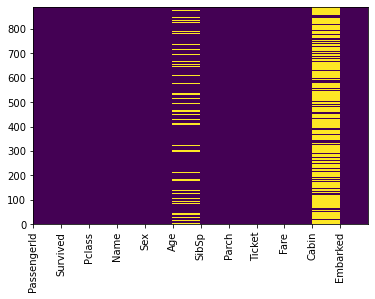

In [7]:
# Looking for missing data on train dataset
plt.pcolor(train_data.isnull())
plt.xticks(np.arange(0.0, len(train_data.columns), 1), train_data.columns, rotation='vertical')
plt.show()

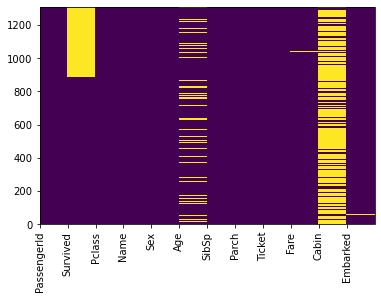

In [8]:
# Looking for missing data on train dataset
plt.pcolor(dataset.isnull())
plt.xticks(np.arange(0.0, len(dataset.columns), 1), dataset.columns, rotation='vertical')
plt.show()

**MISSING VALUES ON NUMERICAL FEATURES**

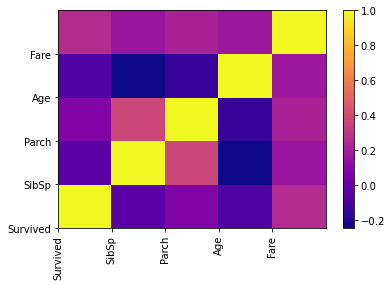

In [9]:
# Correlation between survived and other data
numerical_features = ["Survived","SibSp","Parch","Age","Fare"]
plt.pcolor(dataset[numerical_features].corr(), cmap='plasma')
plt.xticks(np.arange(0, 5), numerical_features, rotation='vertical')
plt.yticks(np.arange(0, 5), numerical_features)
plt.colorbar()
plt.show()

* Fare seems to have a significative correlation with the survival probability.
* In fact, fare seems to be correlated with all other numeric features

**Searching for a good way to fill AGE missing values**

In [10]:
# Split the data of people who survived and not survived to further analysis
survived_data = dataset[dataset['Survived'] == 1.0]
not_survived_data = dataset[dataset['Survived'] == 0.0]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


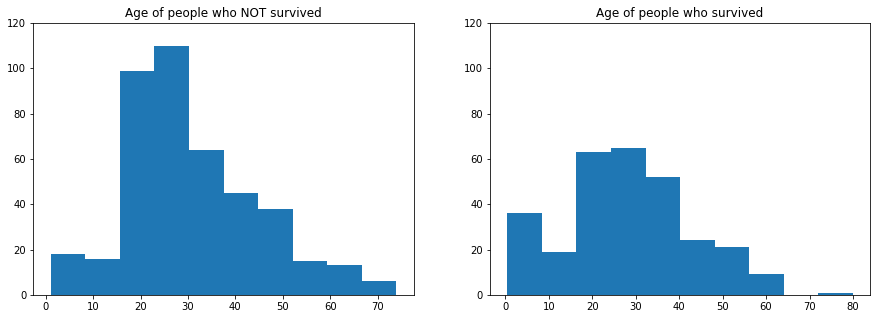

In [11]:
# Plot histogram with the age distributions of people who survived or not
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].hist(not_survived_data['Age'], bins=10)
axes[0].set(title='Age of people who NOT survived');
axes[0].set_ylim(0,120);

axes[1].hist(survived_data['Age'], bins=10)
axes[1].set(title='Age of people who survived');
axes[1].set_ylim(0,120);

plt.subplots_adjust(wspace=0.2, hspace=0)

* Age distributions are not the same in the survived and not survived subpopulations
* Old passengers survived less

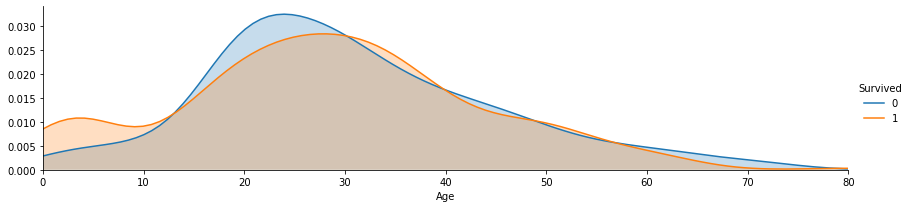

In [12]:
# Explore the Age vs Survived features in a grid view
fig = sns.FacetGrid(train_data, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, dataset['Age'].max()))
fig.add_legend()

* Most people who survived were something between 20 and 30 years old

* We saw that fare has a considerable correlation with tickets fare. The more expensive the ticket, better the class that this passenger will travel
* Lets try to explore the age vs passagenger class now

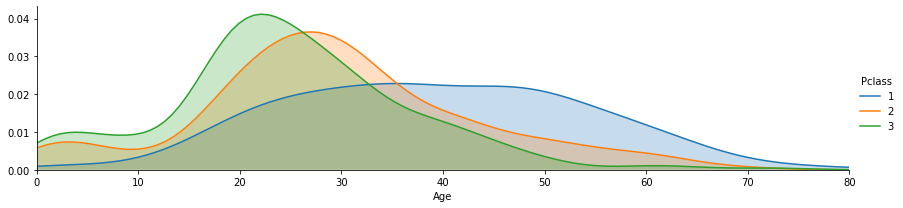

In [13]:
# Explore the Age vs Passengers class features
facet = sns.FacetGrid(dataset, hue="Pclass", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.show()

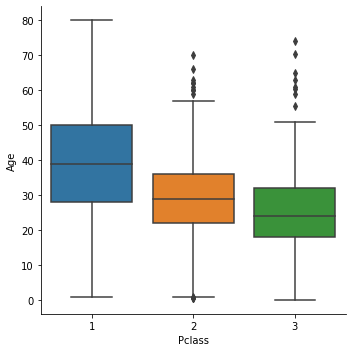

In [14]:
# Explore the Age vs Passengers class features using boxplot 
PA = sns.catplot(data = dataset , x = 'Pclass' , y = 'Age', kind = 'box')

* 1st class passengers are older than 2nd class passengers
* 2nd class passengers are older than 3rd class passengers
* There are more young people in 3rd class 3
* There are more aged passengers in 1st class
* +- 37, 29, 24 respectively are the median values for age of each class
* We can use the median age of similar rows to fill missing values for age

In [15]:
# Filling missing data on age with average of PClass
# using a custom function for age imputation
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

# Age Impute
dataset['Age'] = dataset[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

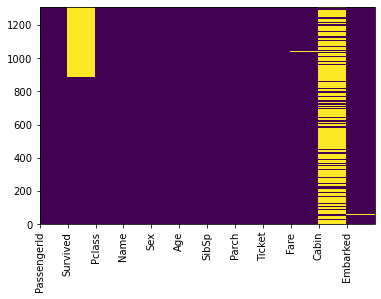

In [16]:
# Looking for missing data on train dataset
plt.pcolor(dataset.isnull())
plt.xticks(np.arange(0.0, len(dataset.columns), 1), dataset.columns, rotation='vertical')
plt.show()

**Searching for a good way to fill FARE missing values**

In [17]:
dataset["Fare"].isnull().sum()

1

Fare has only one missing value - we can fill it with the median

In [18]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

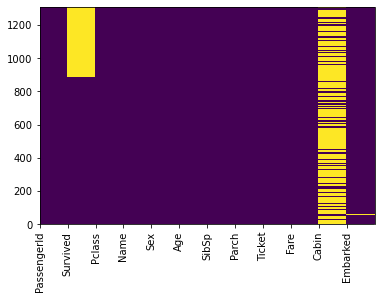

In [19]:
# Reviewing missing data on full dataset
plt.pcolor(dataset.isnull())
plt.xticks(np.arange(0.0, len(dataset.columns), 1), dataset.columns, rotation='vertical')
plt.show()

 **MISSING VALUES ON CATEGORICAL FEATURES**

In [20]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


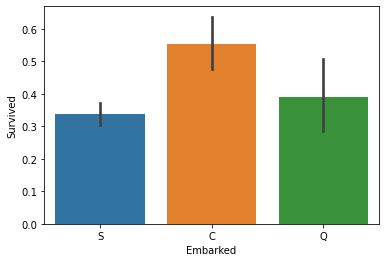

In [21]:
# 'Embarked' vs 'Survived'
sns.barplot(dataset['Embarked'], dataset['Survived']);


In [22]:
dataset["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
dataset["Embarked"].isnull().sum()

2

In [24]:
# Count missing values
print(dataset["Embarked"].isnull().sum()) # 2

# Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

2


In [25]:
# Use one hot encoding to transform "Embarked" into values
embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)
dataset = pd.concat([dataset,embarked], axis = 1)

# We can drop the non-numerical feature now
dataset.drop(['Embarked'] , axis = 1 , inplace = True)

1. **Understanding relationship between "Sex" column and survival rate**

In [26]:
# Convert Sex column into categorical value 0 for male and 1 for female
sex = pd.get_dummies(dataset['Sex'], drop_first = True)
dataset = pd.concat([dataset,sex], axis = 1)

# After now, we really don't need to Sex features, we can drop it.
dataset.drop(['Sex'] , axis = 1 , inplace = True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


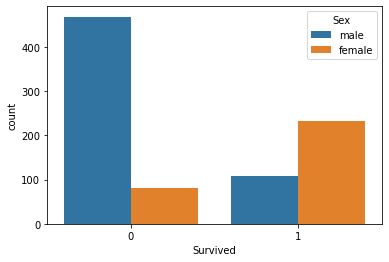

In [27]:
# using Countplot to estimate amount of people who survived related to the sex
sns.countplot(data = train_data , x = 'Survived' , hue = 'Sex')


In [28]:
# Let's see the percentage
train_data[["Sex","Survived"]].groupby('Sex').mean()


,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Female survived more. This is very an important feature for our prediction task.

Understanding relationship between Embarked column and survival rate

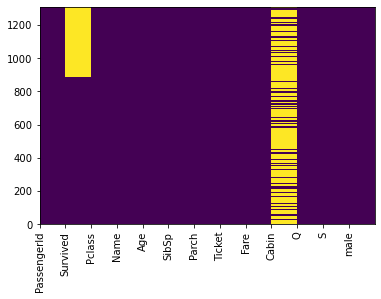

In [29]:
# Reviewing missing data on full dataset
plt.pcolor(dataset.isnull())
plt.xticks(np.arange(0.0, len(dataset.columns), 1), dataset.columns, rotation='vertical')
plt.show()

Now we only need to address "Embarked" to make it become a numeric value 

In [30]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


# Training the model

In [31]:
# Split train and test data again
train_data = dataset[0:891][:]
train_data['Survived'] = train_data['Survived'].astype(int)

In [32]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [33]:
test_data = dataset[891:][:]
test_data = test_data.drop('Survived', axis=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]

features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [36]:
output.to_csv('titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
